In [6]:
import pandas as pd
from pathlib import Path

In [8]:
purchases_df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\Project 3\Super_Shopper\CSVs\Estimated_Purchases.csv")
purchases_df.head(5)


,ESTIMATED_PURCHASES
0,25.669994
1,13.755650
2,24.586235
3,11.486823
4,31.717091


In [9]:
main_df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\Project 3\Super_Shopper\CSVs\Main_Category.csv")
main_df.head(5)


,SUB_CATEGORY
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [10]:
month_df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\Project 3\Super_Shopper\CSVs\Month.csv")
month_df.head(5)


,MONTH
0,1
1,1
2,1
3,1
4,1


In [11]:
subcat_df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\Project 3\Super_Shopper\CSVs\Sub_Category.csv")
subcat_df.tail(5)

,MAIN_CATEGORY
32060674,"Clothing, Shoes & Jewelry"
32060675,"Clothing, Shoes & Jewelry"
32060676,"Clothing, Shoes & Jewelry"
32060677,"Clothing, Shoes & Jewelry"
32060678,"Clothing, Shoes & Jewelry"


In [18]:
combined_df = pd.concat([purchases_df, main_df, month_df, subcat_df], axis=1)
print(combined_df.tail(5))


          ESTIMATED_PURCHASES                     SUB_CATEGORY  MONTH  \
32075513            72.106872  Clothing, Shoes & Jewelry - Men      6   
32075514            61.709651  Clothing, Shoes & Jewelry - Men      6   
32075515            55.443032  Clothing, Shoes & Jewelry - Men      6   
32075516            41.203927  Clothing, Shoes & Jewelry - Men      6   
32075517            51.449931  Clothing, Shoes & Jewelry - Men      6   

         MAIN_CATEGORY  
32075513           NaN  
32075514           NaN  
32075515           NaN  
32075516           NaN  
32075517           NaN  


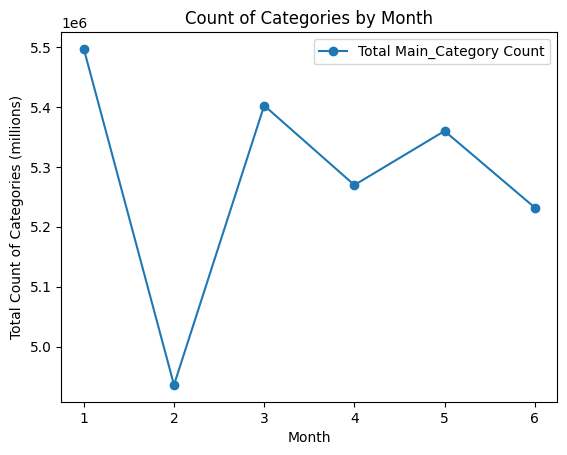

In [26]:
import matplotlib.pyplot as plt
combined_df_reset = combined_df.reset_index()
total_counts = combined_df_reset.groupby('MONTH')['MAIN_CATEGORY'].value_counts().unstack(fill_value=0).sum(axis=1)

plt.plot(total_counts.index, total_counts.values, marker='o', label='Total Main_Category Count')
plt.xlabel('Month')
plt.ylabel('Total Count of Categories (millions)')
plt.title('Count of Categories by Month')
plt.legend()
plt.show()


In [28]:
unique_main_categories = combined_df['MAIN_CATEGORY'].unique()

print(unique_main_categories)

['Target' nan 'Fresh Produce' 'Custom Landing Pages' 'Best Buy'
 'Health & Household' 'Clothing, Shoes & Jewelry' 'Books'
 'Grocery & Gourmet Food' 'Patio, Lawn & Garden'
 'Tools & Home Improvement' 'Electronics' 'Video Games'
 'Industrial & Scientific' 'Cell Phones & Accessories'
 'Musical Instruments' 'Remote & App Controlled Vehicle Parts'
 'Home & Kitchen' 'Beauty & Personal Care' 'Automotive' 'Movies & TV'
 'Pet Supplies' 'Sports & Outdoors' 'Arts, Crafts & Sewing' 'Toys & Games'
 'Amazon Home' 'CDs & Vinyl' 'Kindle Store' 'Baby Products'
 'Sales & Deals' 'Food Service Equipment & Supplies' 'Office Products'
 'Grills & Outdoor Cooking' 'All Beauty' 'Health & Personal Care'
 'Grocery' 'Car Electronics' 'Appliances' 'Handmade Products'
 'SUBSCRIPTION BOXES' 'All Electronics' 'Baby' 'Amazon Music' 'Computers'
 'Hunting & Fishing' 'Car & Vehicle Electronics' 'Collectibles & Fine Art'
 'Software' 'Kitchen & Dining' 'Office Electronics'
 'Small Appliance Parts & Accessories' 'Home Audio

C:\Users\jimmy\AppData\Local\Temp\ipykernel_23504\3798918284.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Purples')


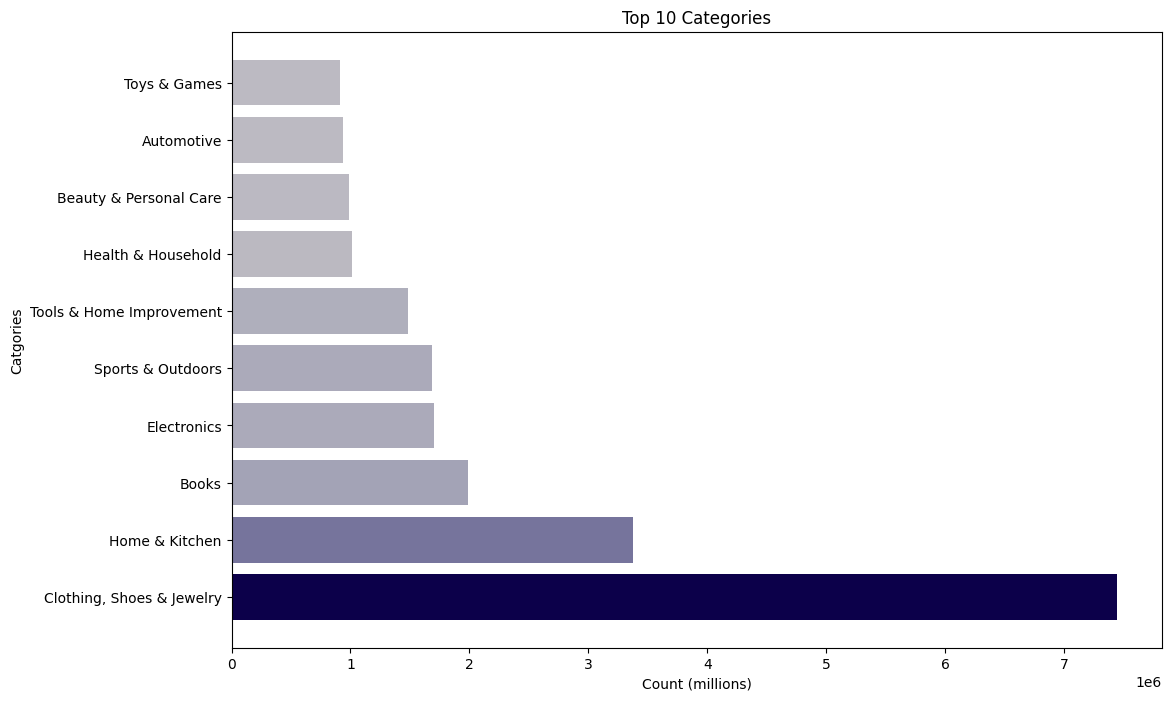

In [41]:
import matplotlib.cm as cm
import numpy as np

combined_df_reset = combined_df.reset_index()
N = 10

top_categories = combined_df_reset['MAIN_CATEGORY'].value_counts().nlargest(N)

cmap = cm.get_cmap('Purples')
norm = plt.Normalize(0, max(top_categories.values))
colors = cmap(norm(top_categories.values))
min_lightness = 0.2 
colors[:, :3] = np.clip(colors[:, :3] - min_lightness, 0, 1)

plt.figure(figsize=(12, 8))
plt.barh(top_categories.index, top_categories.values, color=colors)
plt.xlabel('Count (millions)')
plt.ylabel('Catgories')
plt.title(f'Top {N} Categories')
plt.show()
